In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import 

In [4]:
# Import the dataset and use numerical values only
df = pd.read_csv('water-treatment.data', header=None)
#print(df.isnull().values.any())
df = df.replace('?',np.nan)
df = df.fillna(0)
X = np.array(df.drop([0], axis=1))
X = X.astype(np.float)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,0,407,166,66.3,4.5,2110,...,2000,0,58.8,95.5,0,70.0,0,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,0,443,214,69.2,6.5,2660,...,2590,0,60.7,94.8,0,80.8,0,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,0,528,186,69.9,3.4,1666,...,1888,0,58.2,95.6,0,52.9,0,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,0,62.7,95.6,0,71.0,92.1,78.2,87.5,99.5
5,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,0,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
6,D-8/3/90,41115,6.00,7.8,0,552,262,64.1,5.0,1603,...,1703,0,61.9,93.8,89.1,79.8,0,86.2,90.1,99.0
7,D-9/3/90,36107,5.00,7.7,215,489,334,40.7,6.0,1613,...,1606,0,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100
8,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,D-12/3/90,39246,2.00,7.8,172,506,200,69.0,5.0,1865,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6


In [6]:
X

array([[4.4101e+04, 1.5000e+00, 7.8000e+00, ..., 7.9400e+01, 8.7300e+01,
        9.9600e+01],
       [3.9024e+04, 3.0000e+00, 7.7000e+00, ..., 7.9500e+01, 9.2100e+01,
        1.0000e+02],
       [3.2229e+04, 5.0000e+00, 7.6000e+00, ..., 7.5800e+01, 8.8700e+01,
        9.8500e+01],
       ...,
       [3.2922e+04, 3.0000e-01, 7.4000e+00, ..., 7.7100e+01, 8.8900e+01,
        9.9000e+01],
       [3.2190e+04, 3.0000e-01, 7.3000e+00, ..., 8.7000e+01, 8.9500e+01,
        9.9800e+01],
       [3.0488e+04, 2.1000e-01, 7.5000e+00, ..., 8.1700e+01, 8.6400e+01,
        0.0000e+00]])

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
c = kmeans.cluster_centers_ # centroid location

In [20]:
c

array([[4.46556609e+04, 2.35500000e+00, 7.86724138e+00, 1.56850575e+02,
        3.46534483e+02, 2.20436782e+02, 5.39224138e+01, 3.88218391e+00,
        1.44593103e+03, 7.87701149e+00, 1.69511494e+02, 2.44356322e+02,
        5.33942529e+01, 4.20632184e+00, 1.46676437e+03, 7.84425287e+00,
        1.04603448e+02, 2.48333333e+02, 9.13505747e+01, 6.50913793e+01,
        3.67816092e-01, 1.45297126e+03, 7.72126437e+00, 1.87126437e+01,
        7.99367816e+01, 2.17011494e+01, 7.41729885e+01, 4.57471264e-02,
        1.46595402e+03, 3.40925287e+01, 5.70229885e+01, 8.70080460e+01,
        7.64511494e+01, 6.40545977e+01, 8.14028736e+01, 7.23436782e+01,
        8.73925287e+01, 9.48356322e+01],
       [3.35395843e+04, 2.35536145e+00, 7.79457831e+00, 1.93695783e+02,
        4.31454819e+02, 2.30608434e+02, 6.33496988e+01, 4.66114458e+00,
        1.49140060e+03, 7.81867470e+00, 2.02680723e+02, 2.59960843e+02,
        6.19933735e+01, 5.17409639e+00, 1.50846687e+03, 7.80933735e+00,
        1.22662651e+02,

In [7]:
from matplotlib import pyplot as plt

In [9]:
cluster = [2, 3, 4, 5] 

In [10]:
sse=[26698093573.823402,7592063572.088314,4793437482.684145,3150788614.8367305]

In [11]:
silhouette=[0.48319389879526997,0.6050604896875359,0.48213127480855067,0.500427081213481]

Text(0.5, 1.0, 'Number of Cluster vs. Sum of Squared Error')

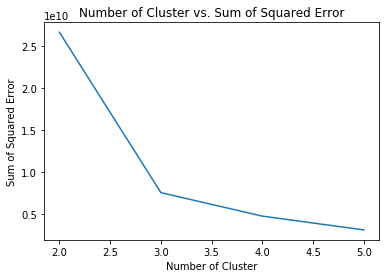

In [14]:
plt.plot(cluster,sse)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')
plt.title('Number of Cluster vs. Sum of Squared Error')

Text(0.5, 1.0, 'Number of Cluster vs. Silhouette Coefficient Average')

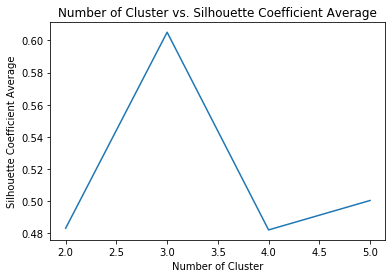

In [15]:
plt.plot(cluster,silhouette)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Coefficient Average')
plt.title('Number of Cluster vs. Silhouette Coefficient Average')